Licensed under the MIT License.

Copyright (c) 2021-2025. All rights reserved.

# Flowers Data

### About the Data
* Data source: https://www.tensorflow.org/datasets/catalog/oxford_flowers102
  * 102 classes in total, each class has 40 ~ 258 images
  * `train_ds`: 1020 images, 10 images per class
  * `val_ds`: 1020 images, 10 images per class
  * `test_ds`: 6149 images, 20+ images per class


* About `tensorflow_datasets` package
  * Data loading `load()` function: https://www.tensorflow.org/datasets/api_docs/python/tfds/load

In [156]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import cv2
import numpy as np
from PIL import Image
from matplotlib.pyplot import imshow

In [21]:
ds, info = tfds.load('oxford_flowers102', with_info=True, split=['train', 'validation', 'test'])

train_ds = ds[0]
val_ds = ds[1]
test = ds[2]

### Check Data Info & Examples

In [16]:
print(info)

tfds.core.DatasetInfo(
    name='oxford_flowers102',
    full_name='oxford_flowers102/2.1.1',
    description="""
    The Oxford Flowers 102 dataset is a consistent of 102 flower categories commonly occurring
    in the United Kingdom. Each class consists of between 40 and 258 images. The images have
    large scale, pose and light variations. In addition, there are categories that have large
    variations within the category and several very similar categories.
    
    The dataset is divided into a training set, a validation set and a test set.
    The training set and validation set each consist of 10 images per class (totalling 1020 images each).
    The test set consists of the remaining 6149 images (minimum 20 per class).
    
    Note: The dataset by default comes with a test size larger than the train
    size. For more info see this [issue](https://github.com/tensorflow/datasets/issues/3022).
    """,
    homepage='https://www.robots.ox.ac.uk/~vgg/data/flowers/102/',
    data

In [17]:
example=train_ds.take(10) 

for e in example:
    print(list(e.keys()))
    image = e["image"]
    label = e["label"]
    print(image.shape, label)

['file_name', 'image', 'label']
(500, 667, 3) tf.Tensor(72, shape=(), dtype=int64)
['file_name', 'image', 'label']
(500, 666, 3) tf.Tensor(84, shape=(), dtype=int64)
['file_name', 'image', 'label']
(670, 500, 3) tf.Tensor(70, shape=(), dtype=int64)
['file_name', 'image', 'label']
(500, 505, 3) tf.Tensor(51, shape=(), dtype=int64)
['file_name', 'image', 'label']
(500, 672, 3) tf.Tensor(48, shape=(), dtype=int64)
['file_name', 'image', 'label']
(500, 761, 3) tf.Tensor(83, shape=(), dtype=int64)
['file_name', 'image', 'label']
(667, 500, 3) tf.Tensor(42, shape=(), dtype=int64)
['file_name', 'image', 'label']
(500, 672, 3) tf.Tensor(58, shape=(), dtype=int64)
['file_name', 'image', 'label']
(500, 667, 3) tf.Tensor(40, shape=(), dtype=int64)
['file_name', 'image', 'label']
(617, 500, 3) tf.Tensor(35, shape=(), dtype=int64)


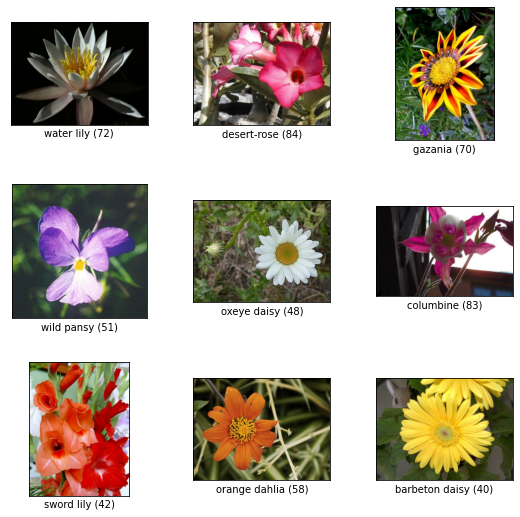

In [18]:
fig = tfds.show_examples(train_ds, info)

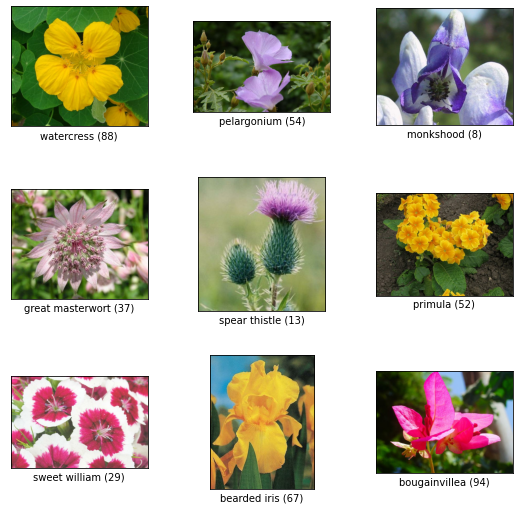

In [19]:
fig = tfds.show_examples(val_ds, info)

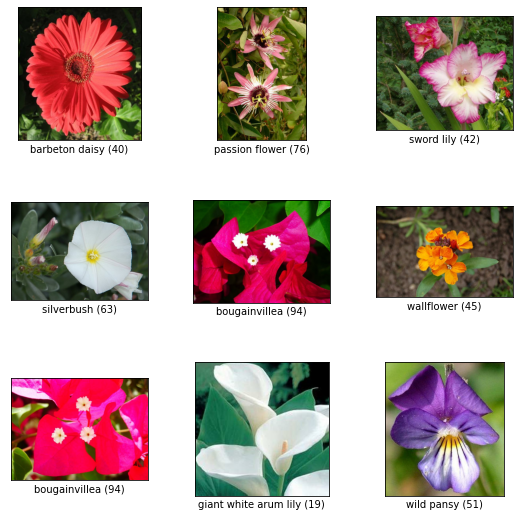

In [22]:
fig = tfds.show_examples(test_ds, info)

### Data Generation

* Data generation goals
  * Each image will be re-shaped to the same size `(300, 300, 3)`
  * I'm going to put `train_ds` and `test_ds` together as training dataset, use `val_ds` as the testing dataset

In [111]:
# put train_ds and test_ds together as the training set
train_lst = list(train_ds)
train_lst.extend(list(test_ds))

# val_ds as the testing set
test_lst = list(val_ds)

print(len(train_lst), len(test_lst))

7169 1020


In [146]:
def tf_ds2np(tf_ds_lst, res_size):
    """
    Resize each image to the same size,
    and convert tensorflow dataset into numpy array format.
    """
    
    for i in range(len(tf_ds_lst)):
        img = tfds.as_numpy(tf_ds_lst[i]['image'])
        res_img = cv2.resize(img, dsize=(res_size, res_size), interpolation=cv2.INTER_CUBIC)
        label = tfds.as_numpy(tf_ds_lst[i]['label'])

        if i == 0:
            X = np.array([res_img])
            y = np.array([[label]])
        else:
            X = np.append(X, [res_img], axis=0)
            y = np.append(y, [[label]], axis=0)
    
    return X, y

In [147]:
res_size = 300

X_train, y_train = tf_ds2np(train_lst, res_size)
X_test, y_test = tf_ds2np(test_lst, res_size)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(7169, 300, 300, 3) (7169, 1) (1020, 300, 300, 3) (1020, 1)


Original Image Size: (500, 667, 3), Resized Image Size: (300, 300, 3)


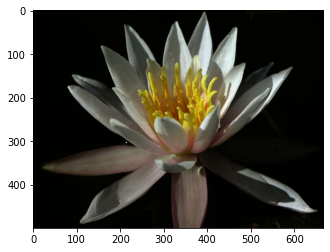

In [157]:
original_img_np = tfds.as_numpy(train_lst[0]['image'])
print(f'Original Image Size: {original_img_np.shape}, Resized Image Size: {X_train[0].shape}')

imshow(original_img_np)

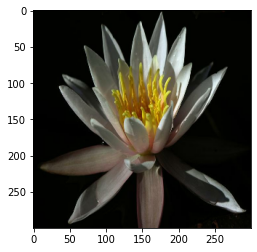

In [155]:
imshow(X_train[0])

In [161]:
# save as data numpy files
np.save('structured_data/flowers_X_train.npy', X_train)
np.save('structured_data/flowers_y_train.npy', y_train)
np.save('structured_data/flowers_X_test.npy', X_test)
np.save('structured_data/flowers_y_test.npy', y_test)

In [163]:
# load the saved numpy files
new_X_train = np.load('structured_data/flowers_X_train.npy')
print(new_X_train.shape)
new_y_train= np.load('structured_data/flowers_y_train.npy')
print(new_y_train.shape)
new_X_test = np.load('structured_data/flowers_X_test.npy')
print(new_X_test.shape)
new_y_test = np.load('structured_data/flowers_y_test.npy')
print(new_y_test.shape)

(7169, 300, 300, 3)
(7169, 1)
(1020, 300, 300, 3)
(1020, 1)


#### Generate Normalized Images

In [164]:
norm_X_train = X_train.astype('float32')  / 255
norm_X_test = X_test.astype('float32')  / 255

print(norm_X_train.shape, norm_X_test.shape)

(7169, 300, 300, 3) (1020, 300, 300, 3)


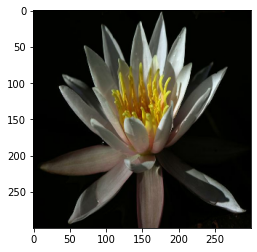

In [165]:
imshow(norm_X_train[0])

In [169]:
np.save('structured_data/flowers_X_train_norm.npy', norm_X_train)
np.save('structured_data/flowers_X_test_norm.npy', norm_X_test)